# Session5. Clustering

## 데이터 구하기

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [14]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 데이터 살펴보기

In [22]:
import pandas as pd

context = iris['data']
df_iris = pd.DataFrame(context, columns=iris['feature_names'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
df_label = pd.DataFrame(iris['target'], columns=['labels'])
df_label.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [29]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [30]:
df_iris[['petal length (cm)', 'petal width (cm)']]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

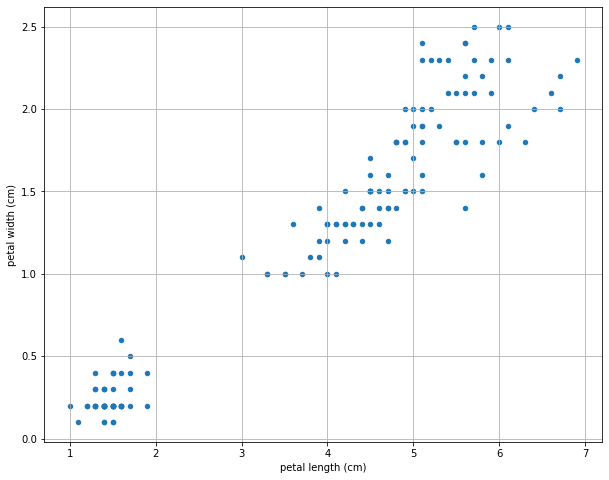

In [55]:
df_correlated = df_iris[['petal length (cm)', 'petal width (cm)']]
df_correlated.plot(figsize=(10,8), kind='scatter', x='petal length (cm)', y='petal width (cm)', grid=True)

## 데이터 전처리하기

In [60]:
np_correlated = df_correlated.to_numpy()
np_correlated[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [62]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(np_correlated)
np_correlated_scaled = ss.transform(np_correlated)
np_correlated_scaled[:5]

array([[-1.34022653, -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.39706395, -1.3154443 ],
       [-1.2833891 , -1.3154443 ],
       [-1.34022653, -1.3154443 ]])

<AxesSubplot:xlabel='0', ylabel='1'>

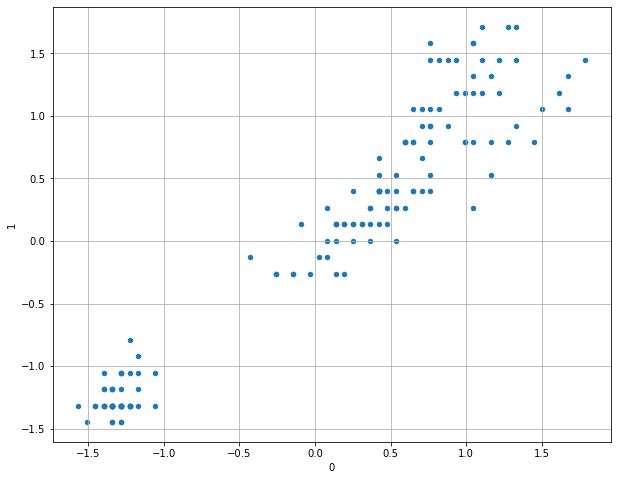

In [65]:
pd.DataFrame(np_correlated_scaled).plot(figsize=(10,8), kind='scatter', x=0, y=1, grid=True)

In [66]:
data_input = np_correlated_scaled
data_input[:5]

array([[-1.34022653, -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.39706395, -1.3154443 ],
       [-1.2833891 , -1.3154443 ],
       [-1.34022653, -1.3154443 ]])

In [69]:
data_label = df_label.to_numpy()
data_label[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

## 데이터셋 나누기

In [70]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(data_input, data_label, stratify=data_label)

In [76]:
len([e for e in train_label if e == 0]) / len(train_label)

0.33035714285714285

In [77]:
len([e for e in test_label if e == 0]) / len(test_label)

0.34210526315789475

## 군집화 모델링하기

In [107]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(train_input)

KMeans(n_clusters=2)

In [108]:
km.cluster_centers_

array([[ 0.61194963,  0.6063856 ],
       [-1.3064313 , -1.24784939]])

In [109]:
center_1 = km.cluster_centers_[0]
center_1

array([0.61194963, 0.6063856 ])

In [110]:
center_2 = km.cluster_centers_[1]
center_2

array([-1.3064313 , -1.24784939])

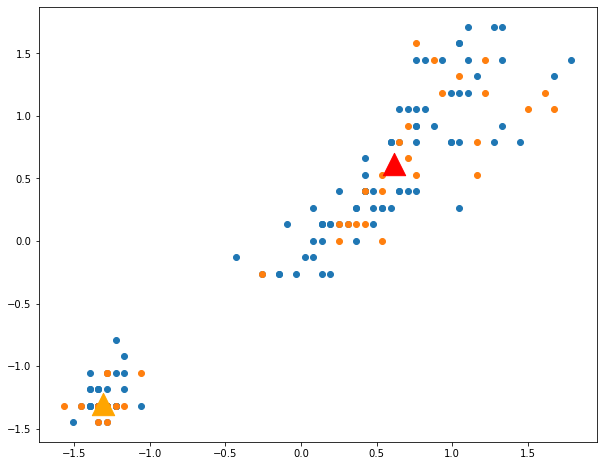

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter(center_1[0], center_1[0], c='red' ,marker='^', s=500)
plt.scatter(center_2[0], center_2[0], c='orange' ,marker='^', s=500)
plt.show()

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

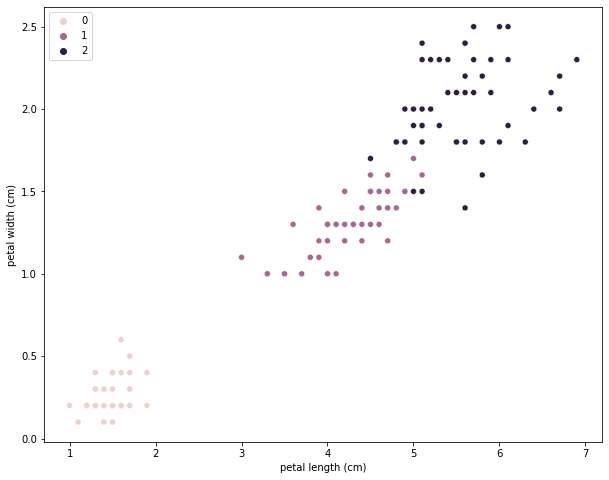

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_correlated, x='petal length (cm)', y='petal width (cm)', hue=data_label.reshape(-1))

## 적정 군집수 찾기

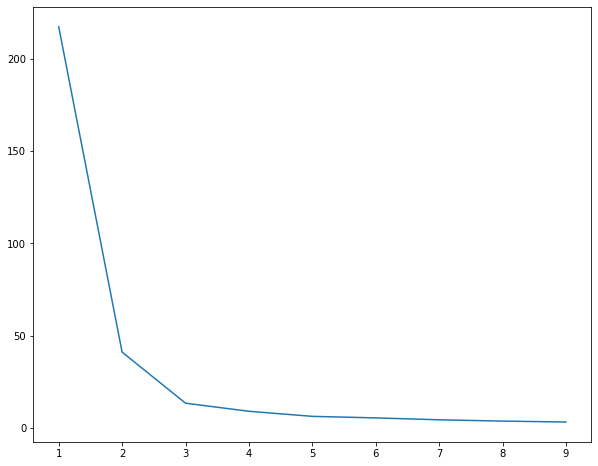

In [117]:
import matplotlib.pyplot as plt


num_centroid = range(1, 10)
inertias = []

for k in num_centroid:
    model = KMeans(n_clusters=k)
    model.fit(train_input)
    inertias.append(model.inertia_)

    
plt.figure(figsize=(10,8))
plt.plot(num_centroid, inertias)
plt.show()

In [118]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(train_input)

KMeans(n_clusters=3)

In [119]:
km.cluster_centers_

array([[ 1.00348149,  1.14685186],
       [-1.3064313 , -1.24784939],
       [ 0.28726467,  0.15819406]])

In [120]:
center_1 = km.cluster_centers_[0]
center_1

array([1.00348149, 1.14685186])

In [121]:
center_2 = km.cluster_centers_[1]
center_2

array([-1.3064313 , -1.24784939])

In [122]:
center_3 = km.cluster_centers_[2]
center_3

array([0.28726467, 0.15819406])

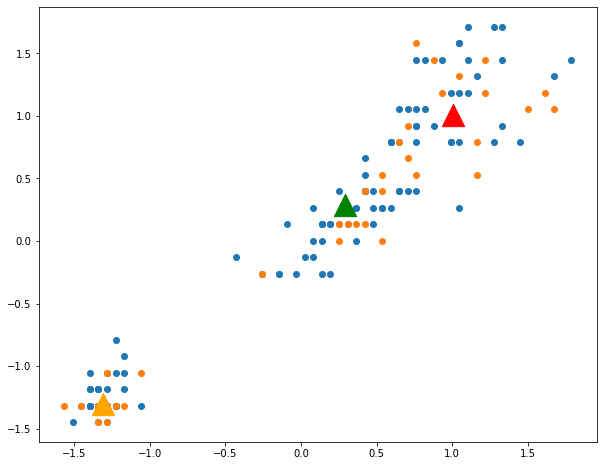

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter(center_1[0], center_1[0], c='red' ,marker='^', s=500)
plt.scatter(center_2[0], center_2[0], c='orange' ,marker='^', s=500)
plt.scatter(center_3[0], center_3[0], c='green' ,marker='^', s=500)
plt.show()